<a href="https://colab.research.google.com/github/ikukang/MLwithPython/blob/master/3_5_Classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)          # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)       # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

# Warning Message hide
import warnings
warnings.filterwarnings('ignore')

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

# 다중 분류 (Reuter Dataset)
Reuter Dataset은 46개의 배타적인 Topic으로 이루어진 Reuter News Dataset 임

Train Data : 8982건, Test Data : 2246건

데이터는 다음과 같이 전처리 되어 있음

(1) 각 리뷰의 단어가 이에 대응하는 정수로 변환되어 있음

(2) Train/Test Label은 0 ~ 45 까지 정수(총 46가지 Topic) 으로 구분되어 있음

In [3]:
from keras.datasets import reuters
(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_data.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [5]:
print(train_data[0])
print(train_label[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[10]])

print(decoded_newswire)

557056/550378 [==============================] - 0s 0us/step
? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [7]:
train_label[10]

3

In [0]:
# 전처리 하여 숫자만으로 구성된 리스트를 신경망에 바로 주입 할 수 없으므로, 
# (1)이를 Matrix(2차원 텐서)로 변환
# (2) 각 row(숫자로 구성되어 있는 전처리된 리뷰)의 개별 숫자값을 column 값으로 하여, 해당  (row, column)의 0 값 -> 1 로 변경

import numpy as np

def vectorized_sequence(rows, dimension = 10000):
    results = np.zeros((len(rows), dimension))

    for i, col in enumerate(rows):
        results[i, col] = 1.
    
    return results

x_train = vectorized_sequence(train_data)
x_test = vectorized_sequence(test_data)

In [9]:
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, col in enumerate(labels):
        results[i, col] = 1.
    
    return results

onehot_train_label = to_one_hot(train_label)
onehot_test_label = to_one_hot(test_label)


In [11]:
print(onehot_train_label.shape)
print(onehot_test_label.shape)

(8982, 46)
(2246, 46)


In [12]:
onehot_test_label[0:2]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
# to_categorical function을 사용하여 onehot과 동일하게 구현 가능
from keras.utils.np_utils import to_categorical

one_hot_train_label = to_categorical(train_label)
one_hot_test_label = to_categorical(test_label)

In [14]:
one_hot_test_label[1]
print('\n')
onehot_test_label[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

In [16]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [17]:
x_val = x_train[:2000]
y_val = one_hot_train_label[:2000]

partial_x_train = x_train[2000:]
partial_y_train = one_hot_train_label[2000:]

print(x_val.shape)
print(y_val.shape)
print(partial_x_train.shape)
print(partial_y_train.shape)

(2000, 10000)
(2000, 46)
(6982, 10000)
(6982, 46)


In [18]:
history = network.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6982 samples, validate on 2000 samples
Epoch 1/20





6982/6982 [==============================] - 10s 1ms/step - loss: 1.9880 - acc: 0.5791 - val_loss: 1.3429 - val_acc: 0.6920
Epoch 2/20
6982/6982 [==============================] - 0s 71us/step - loss: 0.8908 - acc: 0.8064 - val_loss: 1.0823 - val_acc: 0.7735
Epoch 3/20
6982/6982 [==============================] - 0s 71us/step - loss: 0.5296 - acc: 0.8926 - val_loss: 0.9557 - val_acc: 0.7965
Epoch 4/20
6982/6982 [==============================] - 0s 70us/step - loss: 0.3377 - acc: 0.9268 - val_loss: 0.9497 - val_acc: 0.7955
Epoch 5/20
6982/6982 [==============================] - 0s 71us/step - loss: 0.2605 - acc: 0.9421 - val_loss: 0.9173 - val_acc: 0.8160
Epoch 6/20
6982/6982 [==============================] - 0s 69us/step - loss: 0.1842 - acc: 0.9549 - val_loss: 0.9503 - val_acc: 0.8030
Epoch 7/20
6982/6982 [==================

In [19]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 46)                5934      
Total params: 5,192,110
Trainable params: 5,192,110
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

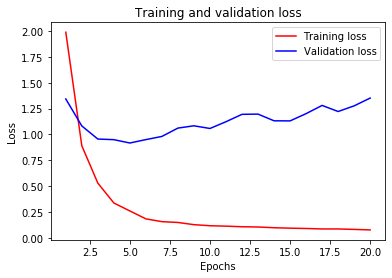

In [20]:
# Training & Validation Loss Graph
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

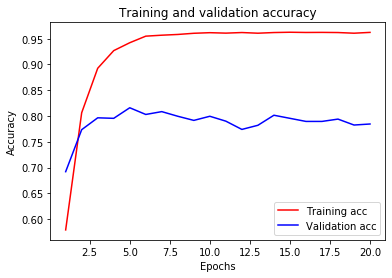

In [21]:
# Training & Validation Accuracy Graph
plt.clf()   # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
# 위의 그래프에서 epoch = 5를 초과하면 과적합이 발생함을 알 수 있으므로, epoch=8로 Network을 다시 구성
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# fit method로 Training 시, epoch = 8로 Setting 하여 과적합 방지
model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))

# evaluate method를 이용하여  test data에 대한 loss, accuracy를 계산
loss, accuracy = model.evaluate(x_test, one_hot_test_label)

Train on 6982 samples, validate on 2000 samples
Epoch 1/5
6982/6982 [==============================] - 1s 104us/step - loss: 1.9511 - acc: 0.5610 - val_loss: 1.3008 - val_acc: 0.7130
Epoch 2/5
6982/6982 [==============================] - 0s 70us/step - loss: 0.8620 - acc: 0.8108 - val_loss: 1.0347 - val_acc: 0.7800
Epoch 3/5
6982/6982 [==============================] - 0s 70us/step - loss: 0.5344 - acc: 0.8866 - val_loss: 0.9731 - val_acc: 0.7935
Epoch 4/5
6982/6982 [==============================] - 0s 70us/step - loss: 0.3247 - acc: 0.9318 - val_loss: 1.0530 - val_acc: 0.7685
Epoch 5/5
6982/6982 [==============================] - 0s 69us/step - loss: 0.2284 - acc: 0.9474 - val_loss: 1.0065 - val_acc: 0.7975


2246/2246 [==============================] - 0s 80us/step


In [23]:
print('test_acc : ', accuracy)
print('test_loss : ', loss)

test_acc :  0.7729296527424776
test_loss :  1.0373105966715757


In [24]:
# 불균형한 Dataset을 사용하여 무작위로 분류 시 확률

import copy
test_label_copy = copy.copy(test_label)
np.random.shuffle(test_label_copy)
hits_array = np.array((test_label) == np.array(test_label_copy))

float(np.sum(hits_array)) / len(test_label)

0.18477292965271594

In [25]:
np.sum(hits_array)
print('\n')
len(test_label)       

415

2246

In [0]:
predictions = model.predict(x_test)

In [27]:
predictions.shape
print('\n')
predictions[0]
print('\n')
np.argmax(predictions[1])
print('\n')
test_label[1]

cnt = 0
for i in range(len(test_label)):
    if np.argmax(predictions[i]) == test_label[i]:
        cnt += 1

print('\n')
print(float(cnt)/len(test_label))

(2246, 46)

array([5.8728590e-05, 1.2595147e-03, 4.0111163e-06, 8.7827820e-01,
       1.1482053e-01, 5.4524658e-06, 2.0028204e-04, 1.9998266e-05,
       7.8994530e-04, 4.5513698e-05, 3.3000510e-05, 2.1495388e-04,
       5.2874057e-05, 3.8155826e-04, 4.1244937e-05, 4.1767151e-05,
       9.1728684e-04, 1.3761489e-05, 1.0492573e-04, 1.3645706e-04,
       9.3227252e-04, 1.5460857e-04, 2.2085436e-05, 6.8495669e-05,
       3.5490146e-05, 1.1886971e-05, 3.6351885e-06, 2.6284068e-05,
       1.0867142e-04, 8.6421729e-05, 1.3747132e-04, 7.9835800e-06,
       2.1525471e-05, 3.2933607e-05, 6.7157780e-05, 1.0943113e-06,
       5.6022219e-04, 1.8528017e-05, 3.9419338e-05, 1.0241237e-04,
       1.1081593e-06, 2.2032695e-05, 6.1534418e-05, 5.0665898e-05,
       2.1403334e-06, 3.9155916e-06], dtype=float32)

10

10



0.7729296527159395
